# Exemple 2

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [45]:
score = pd.read_csv('C:/Users/hed/Desktop/Projet ML/test_scores.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("score's shape : ", score.shape)

score.head()

score's shape :  (2133, 11)


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0


In [46]:
print(score.shape)

(2133, 11)


In [47]:
x=score.iloc[0:len(score),9]
y=score.iloc[0:len(score),10]

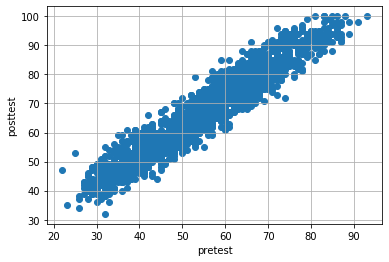

In [48]:
import matplotlib.pyplot as plt
axes=plt.axes()
axes.grid()
plt.xlabel('pretest')
plt.ylabel('posttest')
plt.scatter(x,y)

In [49]:
from scipy import stats
import statsmodels.api as sm
model=sm.OLS(x,y).fit()


In [50]:
import numpy as np
np.corrcoef(x,y)


array([[1.        , 0.95088429],
       [0.95088429, 1.        ]])

### Testing the model

In [51]:
pred=model.predict([62])
print(pred)

[51.04330343]


In [52]:
pred=model.predict([64])
print(pred)

[52.6898616]


# Exemple 3

## <p>Load the Boston Housing data set from sklearn</p>

In [53]:
from sklearn.datasets import load_boston

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

boston = load_boston()

In [54]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [55]:
boston.data.shape

(506, 13)

In [56]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [57]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Create a pandas DataFrame and display some descriptive statistics. 

In [58]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [59]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
print(boston.target.shape)

(506,)


In [61]:
bos['PRICE'] = boston.target
bos.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Relationship between CRIM and Price')

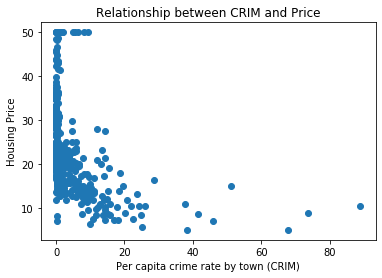

In [63]:
import matplotlib.pyplot as plt
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

Text(0.5, 1.0, 'Relationship between RM and Price')

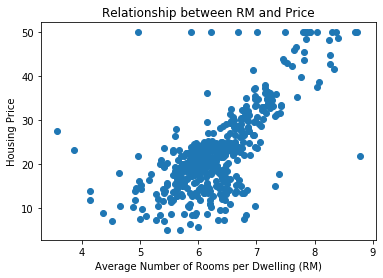

In [64]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

### Check the correlations between predictors and the target

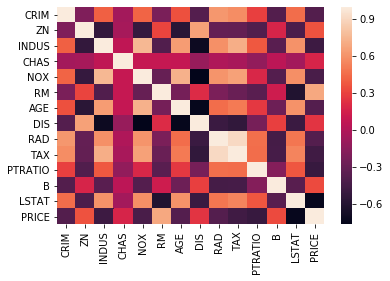

In [65]:
import seaborn as sns
%matplotlib inline

corr_coeffs = bos.corr()
sns.heatmap(corr_coeffs, xticklabels=corr_coeffs.columns, yticklabels=corr_coeffs.columns);

## Build a scikit-learn linear regression model

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 
 

#### Split data
In this subsection, you will split the data set into:
<ul>
    <li>Train data set</li>
    <li>Test data set</li>
    </ul>


In [67]:
from sklearn.model_selection import train_test_split

X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

print('Number of training records: ' + str(X_train.shape[0]))
print('Number of test records: ' + str(X_test.shape[0]))

Number of training records: 339
Number of test records: 167


##### Data has been successfully split into two data sets:
<ul>
    <li>The train data set, which is the largest group, is used for training.</li>
<li>The test data set will be used for model evaluation and is used to test the model.</li>

## Create a scikit-learn pipeline

In [68]:

from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Standardize the features by removing the mean and by scaling to unit variance.

In [69]:
scaler = preprocessing.StandardScaler()

In [70]:
lr = LinearRegression()

Build the pipeline. A pipeline consists of a transformer (Standard Scaler) and an estimator (Linear Regression model)

In [71]:
pipeline = Pipeline([('scaler', scaler), ('lr', lr)])

## Train the model

In [72]:
model = pipeline.fit(X_train, y_train)

Check the model quality.

In [75]:

y_pred = model.predict(X_train)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur les données de test X_test par la méthode .predict()
y_pred = model.predict(X_test)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.7551332741779998  et RMSE= 4.42117161774282
Testing: R2= 0.6956551656111605  et RMSE= 5.341391089030517


Plot the scatter plot of prices vs. predicted prices.

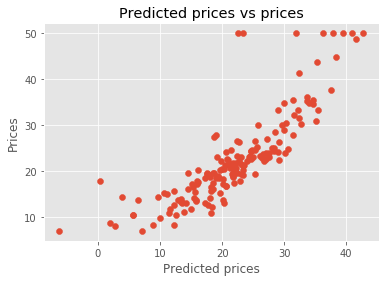

In [74]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.title('Predicted prices vs prices')
plt.ylabel('Prices')
plt.xlabel('Predicted prices')
plot = plt.scatter(y_pred, y_test)